In [1]:
import time
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install geneal
import numpy as np
import pandas as pd
from geneal.genetic_algorithms import ContinuousGenAlgSolver
flowdata = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario1')
d2 = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario2')
d3 = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario3')
d4 = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario5')
flowdata = flowdata.append(d2, ignore_index=True)
flowdata = flowdata.append(d3, ignore_index=True)
flowdata = flowdata.append(d4, ignore_index=True)
flowdata = flowdata[['KTB', 'KTC', 'SKB', 'SKC']] # ensure columns ordering is correct

**Equation**:
$$w\times KTB+x\times KTC-y\times SKB-z\times SKC = m = KTB + KTC - SKB - SKC$$

where *m* is the observed mismatch between JRWW and SKL
- Each set of flow values observed for KTB, KTC, SKB, SKC can be geometrically represented as a line in 4-dimensional space mapped by w, x, y, z

$$w\times KTB+x\times KTC-y\times SKB-z\times SKC-(KTB + KTC - SKB - SKC)=0$$

- By iterating through *test_values* for w, x, y, z, we find the point (w,x,y,z) that minimises the mean distance between (w,x,y,z) and all the lines

$$\sum distance = \sum\frac{|w\times KTB+x\times KTC-y\times SKB-z\times SKC-(KTB + KTC - SKB - SKC)|}{\sqrt{KTB^2+KTC^2+SKB^2+SKC^2}}$$

- Each of w, x, y, z is equal to $\frac{E}{1+E}$ where E is the actual flowmeter error

In [2]:
flowdata

,KTB,KTC,SKB,SKC
0,0.0,390.7,0.0,391.7
1,0.0,388.2,0.0,388.4
2,0.0,408.9,0.0,407.2
3,0.0,413.1,0.0,407.5
4,0.0,408.3,0.0,400.8
...,...,...,...,...
61,466.5,388.9,473.7,382.7
62,455.6,397.0,463.6,388.8
63,462.6,393.9,470.2,387.0
64,455.9,399.5,462.3,391.1


In [3]:
# prepare raw data
flowdata_temp = flowdata
# change the sign of SKB and SKC columns for simpler arithmetic
flowdata_temp['SKB'] *= -1
flowdata_temp['SKC'] *= -1
flowdata_array = flowdata_temp.to_numpy()

The following genetic algorithm attempts to find the best values of flowmeter errors E1, E2, E3, E4 that minimise the sum of the smallest euclidean distances between the final solution point and the lines formed by all the data provided.

Iteration: 100
Best fitness: -0.0024092243135055676
Iteration: 200
Best fitness: -0.0024092243135055676
Iteration: 300
Best fitness: -0.0024092243135055676
Iteration: 400
Best fitness: -0.0024092243135055676
Iteration: 500
Best fitness: -0.0024092243135055676
Iteration: 600
Best fitness: -0.0024092243135055676
Iteration: 700
Best fitness: -0.0024092243135055676
Iteration: 800
Best fitness: -0.002402902990256172
Iteration: 900
Best fitness: -0.002402902990256172
Iteration: 1000
Best fitness: -0.002402902990256172


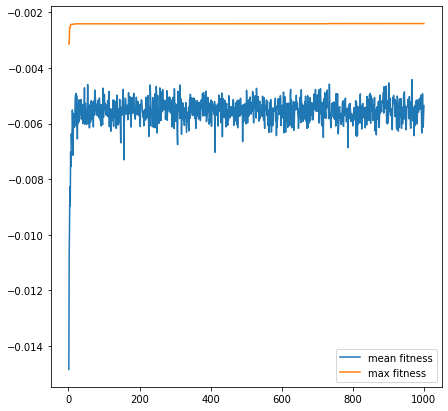


#############################
#			STATS			#
#############################


Total running time: 1 minutes, 1 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.002402902990256172
Best individual: [-2.09595667  1.30350858 -0.69706636 -0.28335858]
CPU times: user 1min, sys: 159 ms, total: 1min 1s
Wall time: 1min 1s


In [4]:
%%time

# genetic algorithm
def flow_fitness_function(data):
    def calc_dist(errors):
        mean_dist = 0
        #convert errors into variables (w,x,y,z)
        wxyz = np.array(list(map(lambda t:(0.01*t/(1+0.01*t)), errors)))
        for params in data:
            m = sum(params) # mismatch
            dist = abs(np.dot(params, wxyz) - m)/np.linalg.norm(params)
            mean_dist += dist
        mean_dist /= len(data)
        return -mean_dist #inverse because GA maximises the function
    return calc_dist

solver = ContinuousGenAlgSolver(
    n_genes = 4,
    fitness_function = flow_fitness_function(flowdata_array),
    variables_limits = (-3,3)
)

solver.solve()

Iteration: 100
Best fitness: -0.002400001014874915
Iteration: 200
Best fitness: -0.002400001014874915
Iteration: 300
Best fitness: -0.002400001014874915
Iteration: 400
Best fitness: -0.002400001014874915
Iteration: 500
Best fitness: -0.002400001014874915
Iteration: 600
Best fitness: -0.002400001014874915
Iteration: 700
Best fitness: -0.002400001014874915
Iteration: 800
Best fitness: -0.002400001014874915
Iteration: 900
Best fitness: -0.002400001014874915
Iteration: 1000
Best fitness: -0.002400001014874915


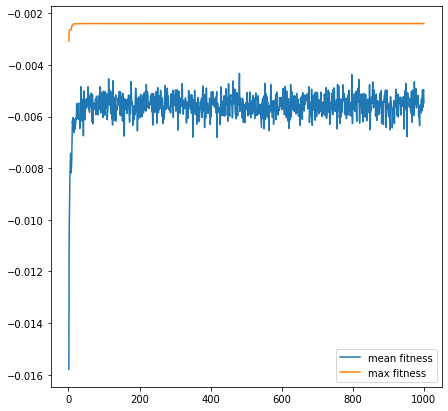


#############################
#			STATS			#
#############################


Total running time: 54 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.002400001014874915
Best individual: [-2.04450667  1.39257965 -0.67644591 -0.18845866]


In [5]:
solver.solve()

Iteration: 100
Best fitness: -0.002380549438948457
Iteration: 200
Best fitness: -0.002380549425040751
Iteration: 300
Best fitness: -0.002380549425040751
Iteration: 400
Best fitness: -0.002380549425040751
Iteration: 500
Best fitness: -0.002380549425040751
Iteration: 600
Best fitness: -0.002380549425040751
Iteration: 700
Best fitness: -0.002380549425040751
Iteration: 800
Best fitness: -0.002380549425040751
Iteration: 900
Best fitness: -0.002380549425040751
Iteration: 1000
Best fitness: -0.002380549425040751


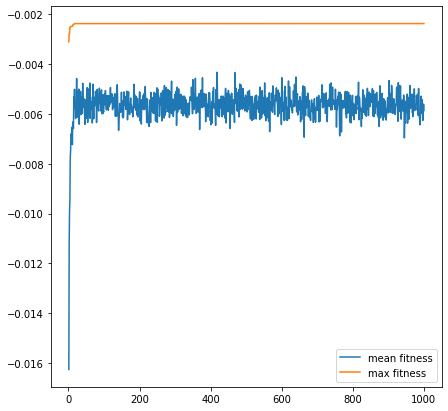


#############################
#			STATS			#
#############################


Total running time: 55 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.002380549425040751
Best individual: [-1.24264957  2.22399406  0.13731674  0.62912909]


In [6]:
solver.solve()